In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load and Preprocess the Image
SIZE = 256
img = cv2.imread("Bill_Gates.jpg")  # Ensure this image exists in your directory
img = cv2.resize(img, (SIZE, SIZE))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = img.astype(np.float32) / 255.0

# Channel, Hight, Width 
img_tensor = torch.tensor(img).permute(2, 0, 1).unsqueeze(0)  # Shape: [1, 3, 256, 256]
# permute changes the axis


In [ ]:
# Step 2: Define the Autoencoder
class ConvAutoencoder(nn.Module):
    def __init__(self):
        super(ConvAutoencoder, self).__init__()
        self.encoder = nn.Sequential(
            # 256x256 starting
            # Conv2d (inChannels(input), outChannels(featureMaps or num of filters), kernelSize, padding
            nn.Conv2d(3, 32, 3, padding=1), nn.ReLU(),
            nn.MaxPool2d(2, stride=2),  # 128x128
            nn.Conv2d(32, 8, 3, padding=1), nn.ReLU(),
            nn.MaxPool2d(2, stride=2),  # 64x64
            nn.Conv2d(8, 8, 3, padding=1), nn.ReLU(),
            nn.MaxPool2d(2, stride=2),  # 32x32
        )
        self.decoder = nn.Sequential(
            # 32x32 starting
            nn.Conv2d(8, 8, 3, padding=1), nn.ReLU(),
            nn.Upsample(scale_factor=2),  # 64x64
            nn.Conv2d(8, 8, 3, padding=1), nn.ReLU(),
            nn.Upsample(scale_factor=2),  # 128x128
            nn.Conv2d(8, 32, 3, padding=1), nn.ReLU(),
            nn.Upsample(scale_factor=2),  # 256x256
            nn.Conv2d(32, 3, 3, padding=1), nn.Sigmoid(),  # RGB Output
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x



In [ ]:
# Step 3: Training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ConvAutoencoder().to(device)
img_tensor = img_tensor.to(device)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# Training for few epochs since it’s a single image
num_epochs = 1000
for epoch in range(num_epochs):
    output = model(img_tensor)
    loss = criterion(output, img_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.6f}")



Epoch [10/10000], Loss: 0.116733
Epoch [20/10000], Loss: 0.094947
Epoch [30/10000], Loss: 0.049622
Epoch [40/10000], Loss: 0.026301
Epoch [50/10000], Loss: 0.017076
Epoch [60/10000], Loss: 0.014369
Epoch [70/10000], Loss: 0.012630
Epoch [80/10000], Loss: 0.011697
Epoch [90/10000], Loss: 0.010938
Epoch [100/10000], Loss: 0.010344
Epoch [110/10000], Loss: 0.009868
Epoch [120/10000], Loss: 0.009464
Epoch [130/10000], Loss: 0.009222
Epoch [140/10000], Loss: 0.008907
Epoch [150/10000], Loss: 0.009398
Epoch [160/10000], Loss: 0.008884
Epoch [170/10000], Loss: 0.008278
Epoch [180/10000], Loss: 0.008104
Epoch [190/10000], Loss: 0.007874
Epoch [200/10000], Loss: 0.007720
Epoch [210/10000], Loss: 0.007561
Epoch [220/10000], Loss: 0.007418
Epoch [230/10000], Loss: 0.007289
Epoch [240/10000], Loss: 0.007170
Epoch [250/10000], Loss: 0.007056
Epoch [260/10000], Loss: 0.006948
Epoch [270/10000], Loss: 0.006841
Epoch [280/10000], Loss: 0.006794
Epoch [290/10000], Loss: 0.006698
Epoch [300/10000], Loss

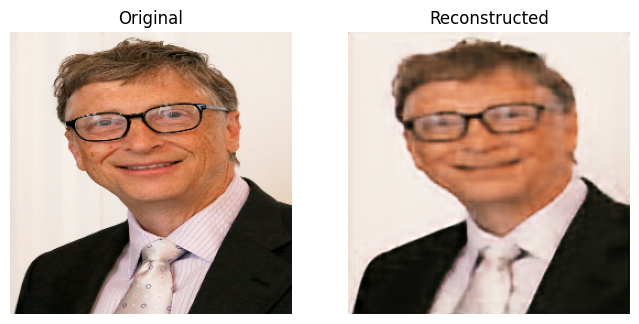

In [7]:
# Step 4: Show Original and Reconstructed Image
reconstructed = output.squeeze(0).detach().cpu().permute(1, 2, 0).numpy()
original = img_tensor.squeeze(0).detach().cpu().permute(1, 2, 0).numpy()

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(original)
plt.title("Original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(reconstructed)
plt.title("Reconstructed")
plt.axis("off")
plt.show()


# Challenge: Use different input on the trained model

In [35]:
def pre_process_input(img):
    SIZE = 256
    img = cv2.resize(img, (SIZE, SIZE))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img.astype(np.float32) / 255.0    

def show_images(original, reconstructed):
    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
    plt.imshow(original)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1,2,2)
    plt.imshow(reconstructed)
    plt.title("Reconstructed Image")
    plt.axis("off")
    plt.show()

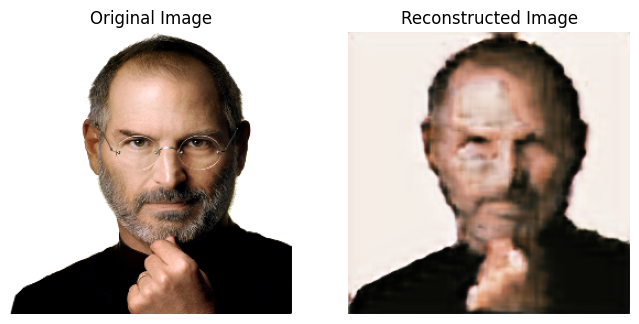

In [37]:

img = cv2.imread("Steve_jobs.jpg")
img = pre_process_input(img)

# Channel, Hight, Width 
img_tensor = torch.tensor(img).permute(2, 0, 1).unsqueeze(0)  # Shape: [1, 3, 256, 256]
# permute changes the axis

# Evaluation
model.eval()    # Set model to evaluation mode
with torch.no_grad(): #No training will happen here
    img_reconstructed = model(img_tensor)

# original = img_tensor.squeeze(0).cpu().permute(1,2,0).numpy()
reconstructed = img_reconstructed.squeeze(0).cpu().permute(1,2,0).numpy()

show_images(img,reconstructed)

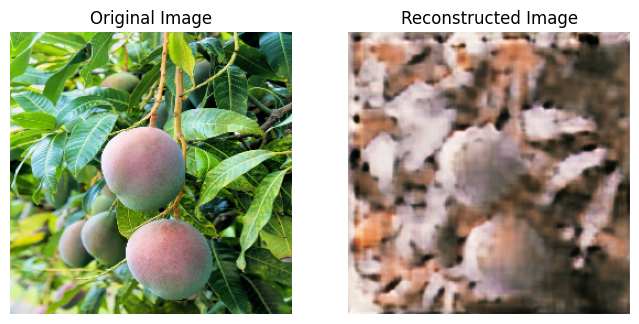

In [36]:

img = cv2.imread("mango.jpg")
img = pre_process_input(img)

# Channel, Hight, Width 
img_tensor = torch.tensor(img).permute(2, 0, 1).unsqueeze(0)  # Shape: [1, 3, 256, 256]
# permute changes the axis

# Evaluation
model.eval()    # Set model to evaluation mode
with torch.no_grad(): #No training will happen here
    img_reconstructed = model(img_tensor)

# original = img_tensor.squeeze(0).cpu().permute(1,2,0).numpy()
reconstructed = img_reconstructed.squeeze(0).cpu().permute(1,2,0).numpy()

show_images(img,reconstructed)

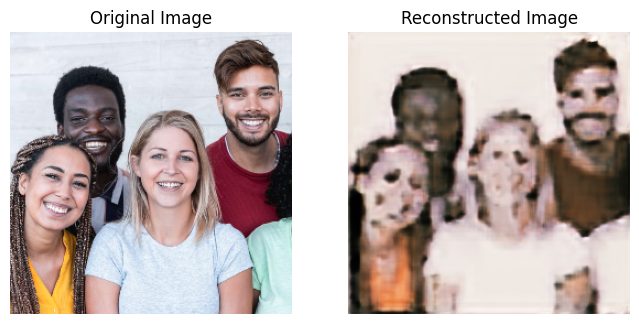

In [38]:

img = cv2.imread("people.png")
img = pre_process_input(img)

# Channel, Hight, Width 
img_tensor = torch.tensor(img).permute(2, 0, 1).unsqueeze(0)  # Shape: [1, 3, 256, 256]
# permute changes the axis

# Evaluation
model.eval()    # Set model to evaluation mode
with torch.no_grad(): #No training will happen here
    img_reconstructed = model(img_tensor)

# original = img_tensor.squeeze(0).cpu().permute(1,2,0).numpy()
reconstructed = img_reconstructed.squeeze(0).cpu().permute(1,2,0).numpy()

show_images(img,reconstructed)